## 📒 **Notebook 01 - Data Preparation for Plant Disease Detection**

In [1]:
import os
import shutil
import splitfolders
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**📁 1. Define data paths**  


In [2]:
RAW_DATA_PATH = "data/raw/plantvillage_dataset/color"
SPLIT_DATA_PATH = "data/split"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

**📦 2. Clean corrupted images**  


In [3]:
def clean_corrupted_images(folder_path):
    total_deleted = 0
    for class_dir in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_dir)
        if not os.path.isdir(class_path):
            continue
        print(f"🔍 Classe: {class_dir}")
        for img_file in os.listdir(class_path):
            try:
                img_path = os.path.join(class_path, img_file)
                img = Image.open(img_path)
                img.verify()
            except:
                print(f"❌ Supprimée: {img_path}")
                os.remove(img_path)
                total_deleted += 1
    print(f"✅ Nettoyage terminé. Total supprimées: {total_deleted} images corrompues.")


In [4]:
# 🚿 Lancer le nettoyage avec suivi
clean_corrupted_images(RAW_DATA_PATH)


🔍 Classe: Apple___Apple_scab
🔍 Classe: Apple___Black_rot
🔍 Classe: Apple___Cedar_apple_rust
🔍 Classe: Apple___healthy
🔍 Classe: Blueberry___healthy
🔍 Classe: Cherry_(including_sour)___healthy
🔍 Classe: Cherry_(including_sour)___Powdery_mildew
🔍 Classe: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
🔍 Classe: Corn_(maize)___Common_rust_
🔍 Classe: Corn_(maize)___healthy
🔍 Classe: Corn_(maize)___Northern_Leaf_Blight
🔍 Classe: Grape___Black_rot
🔍 Classe: Grape___Esca_(Black_Measles)
🔍 Classe: Grape___healthy
🔍 Classe: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
🔍 Classe: Orange___Haunglongbing_(Citrus_greening)
🔍 Classe: Peach___Bacterial_spot
🔍 Classe: Peach___healthy
🔍 Classe: Pepper,_bell___Bacterial_spot
🔍 Classe: Pepper,_bell___healthy
🔍 Classe: Potato___Early_blight
🔍 Classe: Potato___healthy
🔍 Classe: Potato___Late_blight
🔍 Classe: Raspberry___healthy
🔍 Classe: Soybean___healthy
🔍 Classe: Squash___Powdery_mildew
🔍 Classe: Strawberry___healthy
🔍 Classe: Strawberry___Leaf_scorch
🔍 

**✂️ 3. Split into train / val / test (70/15/15)**  


In [5]:
if os.path.exists(SPLIT_DATA_PATH):
    shutil.rmtree(SPLIT_DATA_PATH)

splitfolders.ratio(
    RAW_DATA_PATH,
    output=SPLIT_DATA_PATH,
    seed=42,
    ratio=(.7, .15, .15),
    group_prefix=None
)

Copying files: 54303 files [01:43, 525.21 files/s]


**🧪 4. Create DataGenerators**  


In [6]:
# 🎯 Générateur pour l'entraînement avec augmentation : aide à généraliser et à éviter l'overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalisation des pixels entre 0 et 1
    rotation_range=30,            # Rotation aléatoire jusqu'à 30°
    zoom_range=0.2,               # Zoom aléatoire sur l'image
    width_shift_range=0.2,        # Décalage horizontal
    height_shift_range=0.2,       # Décalage vertical
    shear_range=0.15,             # Cisaillement aléatoire
    horizontal_flip=True,         # Flip horizontal aléatoire
    fill_mode='nearest'           # Remplissage des pixels vides après transformation
)

# 🔍 Générateur pour validation/test : pas d'augmentation, juste normalisation
val_test_datagen = ImageDataGenerator(rescale=1./255)

# 📦 Création du générateur d'entraînement
train_generator = train_datagen.flow_from_directory(
    os.path.join(SPLIT_DATA_PATH, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# 📦 Création du générateur de validation
val_generator = val_test_datagen.flow_from_directory(
    os.path.join(SPLIT_DATA_PATH, 'val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# 📦 Création du générateur de test
test_generator = val_test_datagen.flow_from_directory(
    os.path.join(SPLIT_DATA_PATH, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 37996 images belonging to 38 classes.
Found 8129 images belonging to 38 classes.
Found 8178 images belonging to 38 classes.


**🔍 5. Display augmented image samples**  


C:\Users\cheri\AppData\Local\Temp\ipykernel_12356\292679992.py:9: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cheri\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


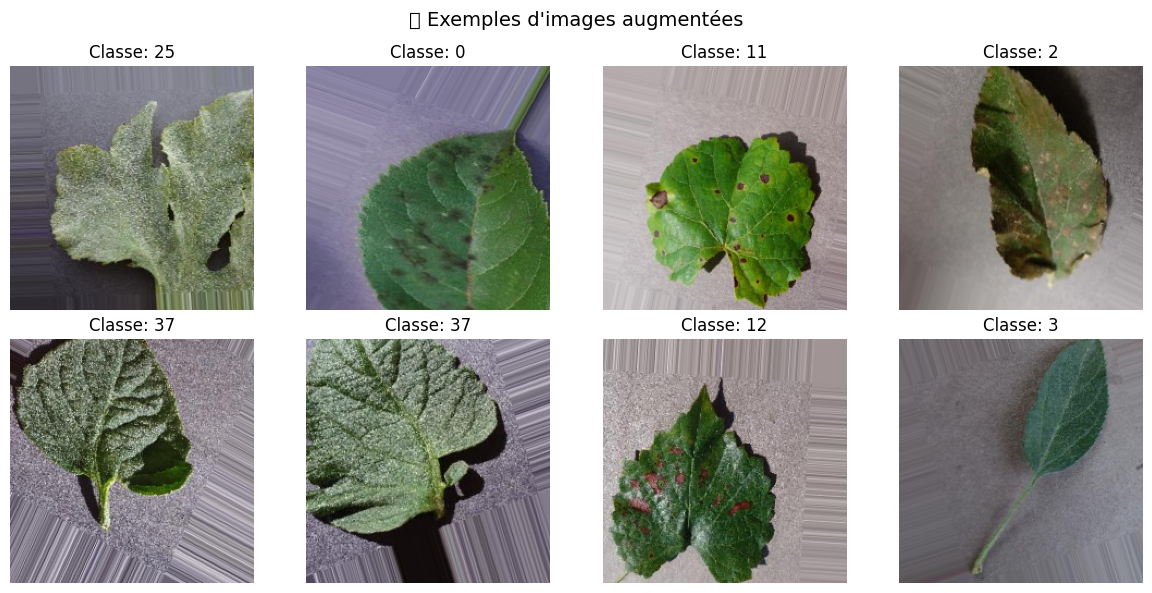

In [7]:
images, labels = next(train_generator)
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.title(f"Classe: {labels[i].argmax()}")
    plt.axis('off')
plt.suptitle("🔁 Exemples d'images augmentées", fontsize=14)
plt.tight_layout()
plt.show()

In [9]:
print("✅ Data cleaned, split completed, generators ready.")


✅ Data cleaned, split completed, generators ready.
